<a href="https://colab.research.google.com/github/devp712/ML-Data/blob/main/ML_techniques_and_strategies_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to determine what portion of individuals were readmitted and which classification/ml model can best predict this. First, I will perform data wrangaling in order to get a sense of the data and eliminate unwanted columns. For the sake of this analysis, all object columns except the target column, readmitted, will be dropped as we are only concerened with the relationship between numeric variables and being readmitted. Afterwards a KNN, Random Forest, and Logistic Regression model will be build and evaluated to determine results. Finally, the model with the high accuracy score will be deemed the best for this analysis

#Importing Libraries

In [1]:
'''!pip install pydot
!pip install pydot-ng
!pip install graphviz
!pip install --upgrade scikit-learn==0.20.3'''

'!pip install pydot\n!pip install pydot-ng\n!pip install graphviz\n!pip install --upgrade scikit-learn==0.20.3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# reading in data 
df = pd.read_csv('https://raw.githubusercontent.com/devp712/ML-Data/main/diabetic_data.csv')

#EDA

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# data has 50 columns and 101,766 rows
df.shape

(101766, 50)

In [6]:
# shows all column names
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
# we can see that there are no null values
# two dtypes int64 or object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# confirms that there are no null values
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [9]:
# creating a list of unwanted columns to drop
# will be dropping all object dtype columns as well as columns that don't indicate 
# any useful data 
columns_drop = df[['race','gender','age','weight','payer_code','medical_specialty','diag_1','diag_2',
                   'diag_3', 'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
                   'acetohexamide', 'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
                   'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
                   'metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','encounter_id','patient_nbr','admission_type_id',
                   'discharge_disposition_id','admission_source_id']]

In [10]:
# dropping the unwanted columns and making the change permanent 
df.drop(columns_drop, axis=1, inplace=True)

In [11]:
# shortening the dataset to only include the first 10,000 values since the 
# original length took too long for colab to process 
df = df.head(10000)

In [12]:
# we can see that only 10,0000 rows and 12 columns are left
df.shape

(10000, 9)

In [13]:
# confirms that there is only integer data types except the targeted object variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   time_in_hospital    10000 non-null  int64 
 1   num_lab_procedures  10000 non-null  int64 
 2   num_procedures      10000 non-null  int64 
 3   num_medications     10000 non-null  int64 
 4   number_outpatient   10000 non-null  int64 
 5   number_emergency    10000 non-null  int64 
 6   number_inpatient    10000 non-null  int64 
 7   number_diagnoses    10000 non-null  int64 
 8   readmitted          10000 non-null  object
dtypes: int64(8), object(1)
memory usage: 703.2+ KB


In [14]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,1,41,0,1,0,0,0,1,NO
1,3,59,0,18,0,0,0,9,>30
2,2,11,5,13,2,0,1,6,NO
3,2,44,1,16,0,0,0,7,NO
4,1,51,0,8,0,0,0,5,NO


Does having a greater number of lab procedures lead to being readmitted more?

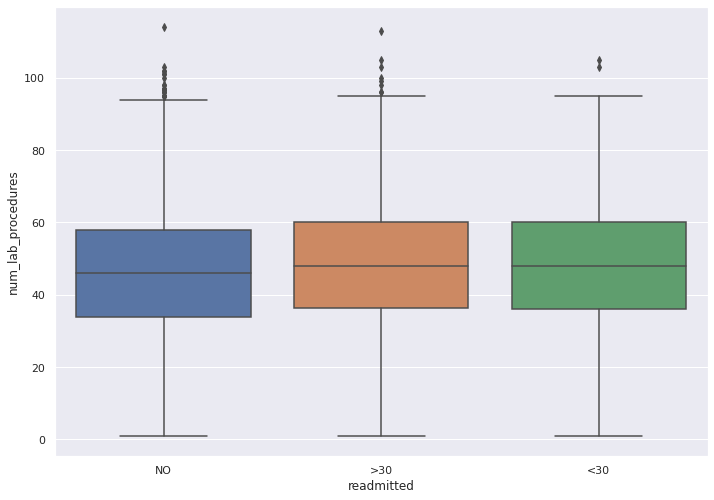

In [15]:
# using seaborn to create a barplot and setting a figure size
# graph shows the relationship between being readmitted and the number of lab procedures
# the patinet has gone through
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x='readmitted', y='num_lab_procedures')
plt.show()
# we can conclude the the number of lab procedures and being readmitted has no
# significant relationship 

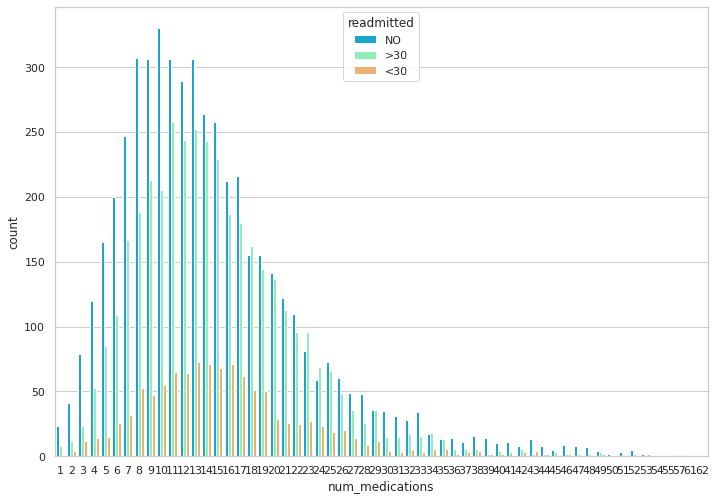

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='num_medications', hue = 'readmitted', data=df, palette = 'rainbow')
# shows that most people who took medications were not readmimtted 
# those who took the least amount of medications were readmited within 30 days

In [17]:
# Question: Do the numeric values in the dataset have a direct relationship

#KNN Classification Model

In [18]:
# assigning StandardScaler() to a variable so we can standardize features
scalar=StandardScaler()

In [19]:
#standardizing all the feature columns except for the target column, this being 'readmitted'
scalar.fit(df.drop('readmitted', axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
#stores all of the scaled values for the features of our data set, not including the target column
scaled_features=scalar.transform(df.drop('readmitted',axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


# Splitting data into subsets

In [21]:
# splitting data into x and y subsets and assiging a test size of 70%
X_train, X_test, y_train, y_test=train_test_split(scaled_features, df['readmitted'], test_size=0.7)

# K value and Accuracy

In [22]:
score=[]

In [23]:
#to measure the accuracy score associated with each k value, stored in a list
for i in range(1,40): 
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))        

Text(0, 0.5, 'Testing Accuracy')

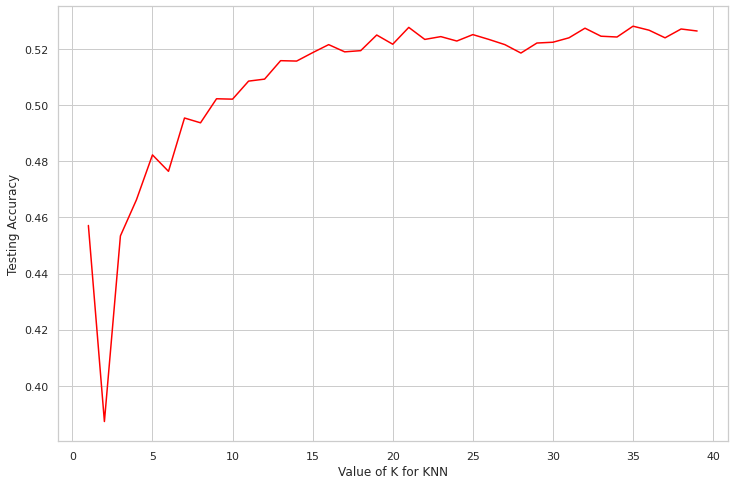

In [24]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color='red')
plt.xlabel('Value of K for KNN') 
plt.ylabel('Testing Accuracy')
# we can see that the optimal k value is 21

In [25]:
error_rate=[]

In [26]:
# trying to determine error rate for k values from 1 to 40 
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

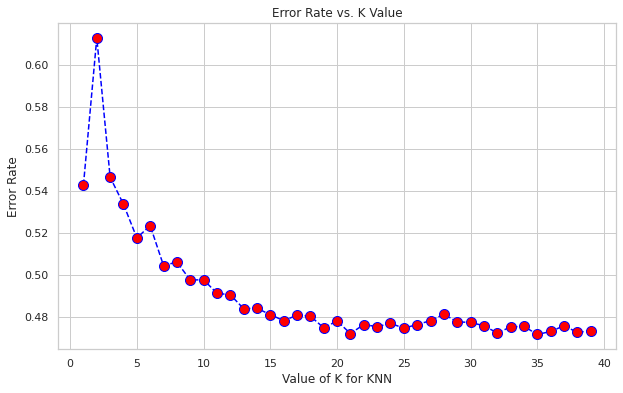

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Value of K for KNN')  
plt.ylabel('Error Rate')
# error rate graph confirms that 21 is optimal k value

# Building KNN Classification Model

In [44]:
# building model and setting k to 21
knn = KNeighborsClassifier(n_neighbors = 21)

In [45]:
#training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [46]:
#stores the predicted y_test values (X_test)
predict=knn.predict(X_test)

# Assesing the model

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# we can see that the majority of patients were not readmitted 
# and a very small portion were readmitted within 30 days

              precision    recall  f1-score   support

         <30       0.00      0.00      0.00       788
         >30       0.45      0.36      0.40      2677
          NO       0.56      0.77      0.65      3535

   micro avg       0.53      0.53      0.53      7000
   macro avg       0.34      0.38      0.35      7000
weighted avg       0.46      0.53      0.48      7000

[[   0  358  430]
 [   1  975 1701]
 [   0  825 2710]]


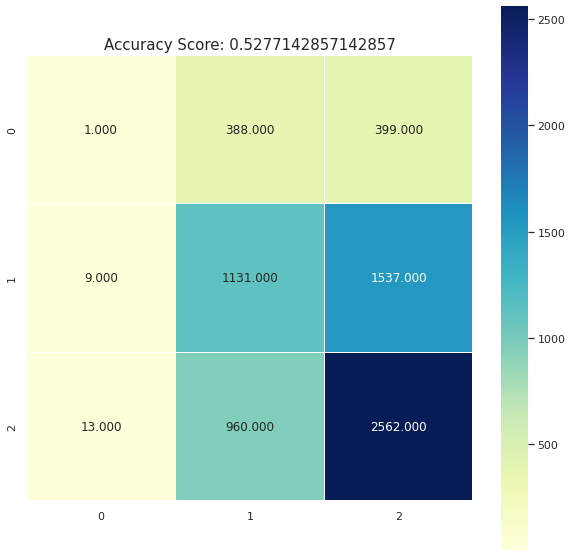

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test,y_test)}'
plt.title(all_sample_title, size = 15);
#displays accuracy score for 52%

We can conclude that the classification model was not able to accurately predict the data for the readmitted column as it received an accuracy score of only 52%. This could potentially be due to only sampling a small portion of the overall dataset and deleting indicative columns.

# Random Forrest Classification Model

In [50]:
rfc = RandomForestClassifier(n_estimators=100) #build model with number of estimators(#of trees in forest)
rfc.fit(X_train, y_train) #train model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
rfc_pred= rfc.predict(X_test)

In [52]:
print(confusion_matrix(y_test, rfc_pred))

[[  33  371  384]
 [  71 1140 1466]
 [  68 1109 2358]]


# Assesing the Model

In [54]:
print(classification_report(y_test, rfc_pred))
#accuracy score overall of 50%
# we can see that the majority of patients were not readmitted 
# and a very small portion were readmitted within 30 days

              precision    recall  f1-score   support

         <30       0.19      0.04      0.07       788
         >30       0.44      0.43      0.43      2677
          NO       0.56      0.67      0.61      3535

   micro avg       0.50      0.50      0.50      7000
   macro avg       0.40      0.38      0.37      7000
weighted avg       0.47      0.50      0.48      7000



# Logistic Regression Model

In [55]:
logmodel=LogisticRegression() #build the model

In [56]:
logmodel.fit(X_train, y_train) #train the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
predict=logmodel.predict(X_test) #y_test_predict

# Assesing the Model

In [58]:
print(classification_report(y_test,predict))
# shows that logistic regression model has accuracy score of 53%
# we can see that the majority of patients were not readmitted 
# and a very small portion were readmitted within 30 days

              precision    recall  f1-score   support

         <30       0.40      0.01      0.01       788
         >30       0.47      0.25      0.33      2677
          NO       0.55      0.86      0.67      3535

   micro avg       0.53      0.53      0.53      7000
   macro avg       0.47      0.37      0.34      7000
weighted avg       0.50      0.53      0.47      7000



#Conclusion

In [65]:
2677/7000

0.38242857142857145

We can conclude that the logistic regression model preformed the best as it had a accuracy score that was marginally higher than the rest. In addition, it can be determined that the majority of patients within the reduced dataset were not admitted. However, approximately 38% of patients were and that a very small amount of patients had to return within 30 days according to model predictions. However, since much of the categorical vraibles were not converted and simply dropped, this could account for the low accuracy score as well as only the first 10,000 rows being selected. 